In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from TP07_K_plus_proches_voisins.src.utils import add_decision_boundary

import warnings
warnings.filterwarnings("ignore")
plt.rcParams["figure.figsize"] = (4,3)

# Régression logistique

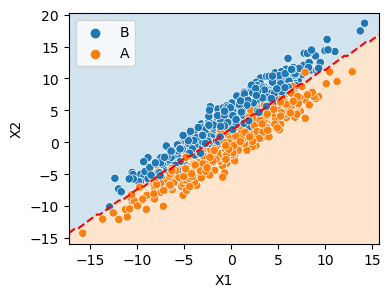

In [2]:
# Q1
Xy = pd.read_csv("TP09_Analyse_discriminante_de_donnees_gaussiennes/data/SynthPara_n1000_p2.csv")
X = Xy.iloc[:, :-1]
y = Xy.iloc[:, -1]
from sklearn.linear_model import LogisticRegression
cls = LogisticRegression(penalty="none")
cls.fit(X, y)
sns.scatterplot(x="X1", y="X2", hue="z", data=Xy)
add_decision_boundary(cls)
plt.show()

In [3]:
# Q2
print(cls.coef_)
print(cls.intercept_)

[[-1.82244181  1.92618178]]
[-3.8899488]


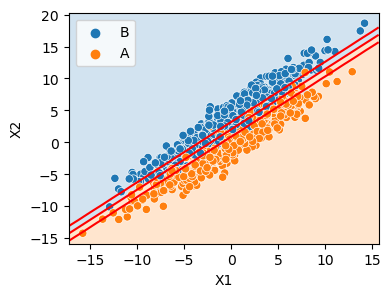

In [4]:
# Q3
sns.scatterplot(x="X1", y="X2", hue="z", data=Xy)
levels = [0.1, 0.5, 0.9]
add_decision_boundary(cls, levels=levels)
plt.show()

#  Régression logistique quadratique

In [5]:
X = np.array([[1], [2], [3]])
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=3)
poly.fit_transform(X)

array([[ 1.,  1.,  1.,  1.],
       [ 1.,  2.,  4.,  8.],
       [ 1.,  3.,  9., 27.]])

In [6]:
# Q4
Xy = pd.read_csv("TP07_K_plus_proches_voisins/data/Synth1-2000.csv")
X = Xy.iloc[:, :-1]
y = Xy.iloc[:, -1]
poly = PolynomialFeatures(degree=2)
Y = poly.fit_transform(X)
cls = LogisticRegression()
cls.fit(Y, y)

LogisticRegression()

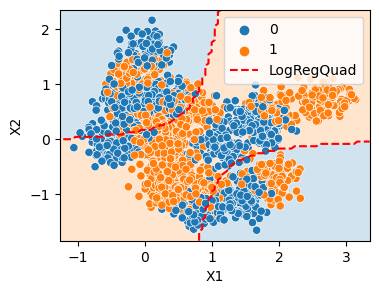

In [7]:
# Q5
from sklearn.pipeline import make_pipeline
poly = PolynomialFeatures(degree=2)
cls = LogisticRegression()
pipe = make_pipeline(poly, cls)
pipe.fit(X, y)
sns.scatterplot(x="X1", y="X2", hue="y", data=Xy)
add_decision_boundary(pipe, label="LogRegQuad")
plt.show()

# Implémentation de la régression logistique binaire

In [8]:
# Q10
from sklearn.linear_model import LogisticRegression as SklearnLogisticRegression
Xy = pd.read_csv("TP09_Analyse_discriminante_de_donnees_gaussiennes/data/SynthPara_n1000_p2.csv")
X = Xy.iloc[:, :-1]
y = Xy.iloc[:, -1]
sk_cls = SklearnLogisticRegression(penalty="none")
sk_cls.fit(X, y)
print(sk_cls.coef_)
print(sk_cls.intercept_)

[[-1.82244181  1.92618178]]
[-3.8899488]


In [9]:
from TP10_Regression_logistique.src.logistic_regression import LogisticRegression
cls = LogisticRegression()
cls.fit(X, y)
print(cls.coef_)
print(cls.intercept_)
print(np.isclose(sk_cls.coef_, cls.coef_))
print(np.isclose(sk_cls.intercept_, cls.intercept_))

[[-1.82244149  1.92618141]]
[-3.88994799]
[[ True  True]]
[ True]


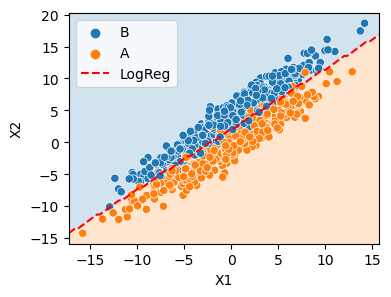

In [10]:
sns.scatterplot(x="X1", y="X2", hue="z", data=Xy)
add_decision_boundary(cls, label="LogReg")
plt.show()

# Régression logistique sur données transformées

In [11]:
# Q8
from sklearn.cluster import KMeans
Xy = pd.read_csv("TP07_K_plus_proches_voisins/data/Synth1-2000.csv")
X = Xy.iloc[:, :-1]
y = Xy.iloc[:, -1]
cls = KMeans(n_clusters=20)
cls.fit(X)
centers = cls.cluster_centers_

In [12]:
# Q9
from sklearn.metrics import pairwise_distances
Y = pairwise_distances(X, centers)
print(Y.shape)

(2000, 20)


In [13]:
# Q10
from sklearn.preprocessing import FunctionTransformer
from sklearn.metrics import pairwise_distances

def distances_to_centers(centers, metric="euclidean"):
    def distances_to_centers0(X):
    # Calcul des inter-distances entre `X` et `centers`
        return pairwise_distances(X, centers, metric=metric)
    return distances_to_centers0

# Fonction qui prend en argument un jeu de données et le transforme.
func = distances_to_centers(centers)

# Création d'un modèle Scikit-learn qui réalise la transformation voulue.
transformer = FunctionTransformer(func)

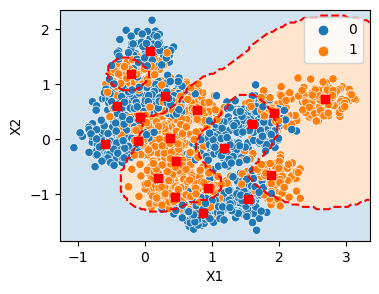

In [14]:
# Q11
from sklearn.pipeline import make_pipeline
pipe = make_pipeline(transformer, LogisticRegression())
pipe.fit(X, y)
ax = sns.scatterplot(x="X1", y="X2", hue="y", data=Xy)
plt.scatter(*centers.T, marker="s", c="r")
add_decision_boundary(pipe)
plt.show()

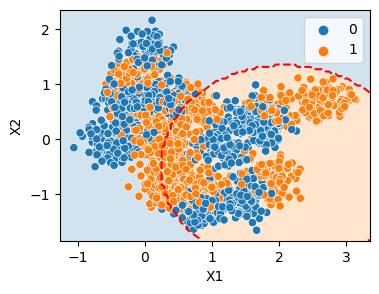

In [15]:
# Q12
func = distances_to_centers(centers, metric="sqeuclidean")
transformer = FunctionTransformer(func)
pipe = make_pipeline(transformer, LogisticRegression())
pipe.fit(X, y)
sns.scatterplot(x="X1", y="X2", hue="y", data=Xy)
add_decision_boundary(pipe)
plt.show()

In [16]:
# Q13
from sklearn.cluster import KMeans
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.metrics import pairwise_distances
class CustomTransformer(BaseEstimator, TransformerMixin):
    def __init__(self, n_clusters, metric="euclidean"):
        # Le nombre de centres à apprendre sur le jeu de données de
        # départ
        self.n_clusters = n_clusters

        # La métrique utilisée pour calculer les distances entre les
        # centres et les exemples du jeu de données
        self.metric = metric

    def fit(self, X, y=None):
        # Apprentissage des centres et stockage dans l'attribut
        # `centers`.
        km = KMeans(n_clusters=self.n_clusters)
        km.fit(X)
        self.centers = km.cluster_centers_

        return self

    def transform(self, X):
        # Retourner les données transformées en utilisant les centres
        # disponibles avec l'attribut `centers`
        return pairwise_distances(X, self.centers, metric=self.metric)

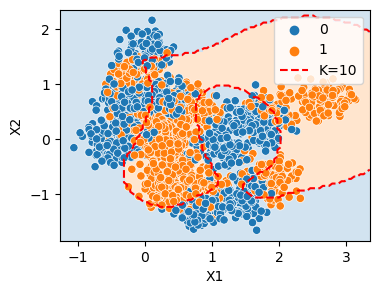

In [17]:
# Q14
pipe = make_pipeline(CustomTransformer(10), LogisticRegression())
pipe.fit(X, y)
sns.scatterplot(x="X1", y="X2", hue="y", data=Xy)
add_decision_boundary(pipe, label="K=10")
plt.show()

In [18]:
# Q15
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
pipe = Pipeline([("tf", CustomTransformer(10)), ("logreg", LogisticRegression())])
n_clusters_list = np.unique(np.round(np.geomspace(1, 500, 20)).astype(int))
param_grid = {"tf__n_clusters": n_clusters_list}
search = GridSearchCV(pipe, param_grid, scoring="accuracy", cv=5)
search.fit(X, y)
search.best_params_

{'tf__n_clusters': 51}

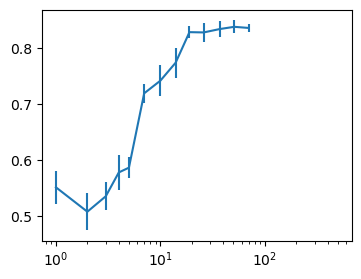

In [19]:
df = pd.DataFrame(
    (
        dict(n_clusters=d["tf__n_clusters"], accuracy=e, std=s)
        for d, e, s in zip(
            search.cv_results_["params"],
            search.cv_results_["mean_test_score"],
            search.cv_results_["std_test_score"],
    )
    )
)
plt.errorbar(df["n_clusters"], df["accuracy"], yerr=df["std"])
plt.xscale("log")
plt.show()

In [20]:
Kopt = df.loc[df.accuracy.idxmax(), "n_clusters"]
acc_opt = df.loc[df.accuracy.idxmax(), "accuracy"]
std_opt = df.loc[df.accuracy.idxmax(), "std"]
Kopt = min(df.loc[df.accuracy >= acc_opt - std_opt, "n_clusters"])
Kopt

19

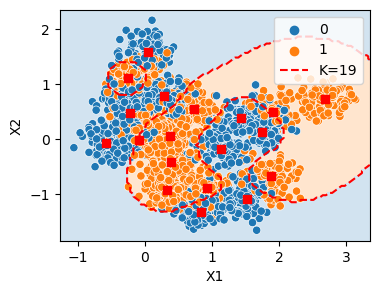

In [21]:
pipe = make_pipeline(CustomTransformer(Kopt), LogisticRegression())
pipe.fit(X, y)
sns.scatterplot(x="X1", y="X2", hue="y", data=Xy)
centers = pipe[0].centers
plt.scatter(*centers.T, marker="s", c="r")
add_decision_boundary(pipe, label=f"K={Kopt}")
plt.show()

# Analyse des coefficients de la régression

In [22]:
Xy = pd.read_csv("TP10_Regression_logistique/data/SAheart.csv")
X = Xy.iloc[:, 1:-1]
y = Xy.iloc[:, -1]
X = X.replace({"famhist": {"Present": 1, "Absent": 0}})
X = X.drop(["adiposity", "typea"], axis=1)
X["intercept"] = 1.0

In [23]:
# Q16
cls = SklearnLogisticRegression(fit_intercept=False, penalty="none", solver="newton-cg")
cls.fit(X, y)

LogisticRegression(fit_intercept=False, penalty='none', solver='newton-cg')

In [24]:
# Q17
import scipy.stats as spst
def Waldtest_LR(model, X):
    prob = model.predict_proba(X)
    What = np.diag(np.product(prob, axis=1))
    In_F = X.T @ What @ X
    shat = np.sqrt(np.diag(np.linalg.inv(In_F)))
    zscores = model.coef_ / shat
    nonsign = np.abs(zscores) <= spst.norm.ppf(1 - 0.05 / 2, loc=0, scale=1)
    return zscores, nonsign

In [25]:
print(X.columns[Waldtest_LR(cls, X)[1][0]])

Index(['sbp', 'obesity', 'alcohol'], dtype='object')


In [26]:
Waldtest_LR(cls, X)

(array([[ 1.02271689,  3.03355791,  3.21845867,  4.17649509, -1.18683263,
          0.13613816,  4.18081086, -4.2829713 ]]),
 array([[ True, False, False, False,  True,  True, False, False]]))

In [27]:
# Q18
from sklearn.metrics import log_loss

def loglike_LR(model, X, y):
    targ = np.column_stack((1 - y, y))
    prob = model.predict_proba(X)
    return -log_loss(targ, prob, normalize=False)

In [28]:
import copy as cp

ll = loglike_LR(cls, X, y)
X_ = cp.copy(X)
cls_ = SklearnLogisticRegression(fit_intercept=False, penalty="none", solver="newton-cg")
cls_.fit(X_, y)
ll_ = loglike_LR(cls_, X_, y)

while 2 * (ll - ll_) <= spst.chi2.ppf(1 - 0.05, 1):
    Xopt = cp.copy(X_)
    clsopt = cp.copy(cls_)
    llopt = cp.copy(ll_)
    X_.drop(columns=X_.columns[np.abs(Waldtest_LR(cls_, X_)[0]).argmin()], inplace=True)
    cls_.fit(X_, y)
    ll_ = loglike_LR(cls_, X_, y)


In [29]:
import copy as cp

ll = loglike_LR(cls, X, y)
X_ = cp.copy(X)
cls_ = SklearnLogisticRegression(fit_intercept=False, penalty="none", solver="newton-cg")
cls_.fit(X_, y)
ll_ = loglike_LR(cls_, X_, y)

while 2 * (ll - ll_) <= spst.chi2.ppf(1 - 0.05, 1):
    Xopt = cp.copy(X_)
    clsopt = cp.copy(cls_)
    llopt = cp.copy(ll_)
    lltab = np.zeros(Xopt.shape[1])
    for i in range(Xopt.shape[1]):
        X_ = cp.copy(Xopt)
        X_.drop(columns=X_.columns[i], inplace=True)
        cls_.fit(X_, y)
        lltab[i] = loglike_LR(cls_, X_, y)
        
    X_ = cp.copy(Xopt)
    X_.drop(columns=X_.columns[lltab.argmax()], inplace=True)
    cls_.fit(X_, y)
    ll_ = loglike_LR(cls_, X_, y)

In [30]:
print(Xopt.columns)
print(clsopt.coef_)

Index(['tobacco', 'ldl', 'famhist', 'age', 'intercept'], dtype='object')
[[ 0.08070059  0.16758415  0.92411669  0.04404247 -4.20427541]]
